# EXPLORATORY DATA ANALYSIS

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import altair as alt

alt.data_transformers.disable_max_rows()

def load(file: str):
    contents = arff.loadarff(file)
    df = pd.DataFrame(contents[0])

    classes = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
    df[classes] = df[classes].apply(lambda s: s.map(int)).to_numpy(dtype=np.float32)
    return df


def process(df: pd.DataFrame):
    attr = [col for col in df.columns if col.startswith("attr")]
    classes = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']

    data = df[attr].to_numpy(dtype=np.float32)
    targets = df[classes].apply(lambda s: s.map(int)).to_numpy(dtype=np.float32)

    return data, targets, attr, classes

In [2]:
df = load("scene.arff")
X, Y, attr_name, target_name = process(df)

In [3]:
df.head()

attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0  0.646467  0.666435  0.685047  0.699053  0.652746  0.407864  0.150309   
1  0.770156  0.767255  0.761053  0.745630  0.742231  0.688086  0.708416   
2  0.793984  0.772096  0.761820  0.762213  0.740569  0.734361  0.722677   
3  0.938563  0.949260  0.955621  0.966743  0.968649  0.869619  0.696925   
4  0.512130  0.524684  0.520020  0.504467  0.471209  0.417654  0.364292   

      attr8     attr9    attr10  ...   attr291   attr292   attr293   attr294  \
0  0.535193  0.555689  0.580782  ...  0.157332  0.247298  0.014025  0.029709   
1  0.757351  0.760633  0.740314  ...  0.251454  0.137833  0.082672  0.036320   
2  0.849128  0.839607  0.812746  ...  0.017166  0.051125  0.112506  0.083924   
3  0.953460  0.959631  0.966320  ...  0.019267  0.031290  0.049780  0.090959   
4  0.562266  0.588592  0.584449  ...  0.198151  0.238796  0.164270  0.184290   

   Beach  Sunset  FallFoliage  Field  Mountain  Urban  
0    1.0     0.0          0.0    0.0       1.0    0.0  
1    1.0     0.0          0.0    0.0       0.0    1.0  
2    1.0     0.0          0.0    0.0       0.0    0.0  
3    1.0     0.0          0.0    0.0       0.0    0.0  
4    1.0     0.0          0.0    0.0       0.0    0.0  

[5 rows x 300 columns]

In [4]:
# Summary statistics
df.info()
print("DATA DESCRIPTION: ")
display(df[attr_name].describe())
display(df[target_name].describe())
print(f"DATASET NULLS: {df.isnull().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Columns: 300 entries, attr1 to Urban
dtypes: float32(6), float64(294)
memory usage: 5.5 MB
DATA DESCRIPTION: 


attr1        attr2        attr3        attr4        attr5  \
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000000   
mean      0.658669     0.694148     0.715307     0.721717     0.713643   
std       0.213751     0.198882     0.188399     0.185636     0.187857   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.534945     0.578996     0.612401     0.614904     0.608947   
50%       0.681079     0.718068     0.737771     0.743758     0.734662   
75%       0.819445     0.843483     0.857111     0.863527     0.854056   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             attr6        attr7        attr8        attr9       attr10  ...  \
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000000  ...   
mean      0.690993     0.653925     0.652328     0.686060     0.707412  ...   
std       0.200795     0.219823     0.198750     0.180039     0.168036  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.583404     0.531731     0.540349     0.577471     0.607320  ...   
50%       0.716582     0.685605     0.677021     0.707229     0.723166  ...   
75%       0.840869     0.817084     0.791899     0.819788     0.831932  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

           attr285      attr286      attr287      attr288      attr289  \
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000000   
mean      0.148694     0.142269     0.135350     0.114879     0.116989   
std       0.176388     0.170977     0.169214     0.155198     0.157281   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.032729     0.029458     0.027336     0.019109     0.019545   
50%       0.086810     0.081752     0.074380     0.058819     0.060276   
75%       0.192630     0.190864     0.173670     0.145307     0.148679   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           attr290      attr291      attr292      attr293      attr294  
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000000  
mean      0.118997     0.119322     0.117860     0.112393     0.110179  
std       0.160983     0.159064     0.156272     0.149826     0.149425  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.021166     0.021149     0.020905     0.021072     0.019841  
50%       0.059569     0.063346     0.063062     0.059217     0.056948  
75%       0.154305     0.155334     0.153047     0.138648     0.137369  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 294 columns]

Beach       Sunset  FallFoliage        Field     Mountain  \
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000000   
mean      0.177399     0.151226     0.164936     0.179892     0.221437   
std       0.382078     0.358340     0.371196     0.384176     0.415306   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Urban  
count  2407.000000  
mean      0.179061  
std       0.383481  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

DATASET NULLS: 0


In [5]:
# Binary classification
df['Urban'].value_counts()

Urban
0.0    1976
1.0     431
Name: count, dtype: int64

In [6]:
# Multi-label distribution
multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
counts = df[multi_labels].apply(pd.value_counts).rename({0: "No", 1: "Yes"})
counts.to_latex("latex/counts.tex")
counts

Beach  Sunset  FallFoliage  Field  Mountain  Urban
No    1980    2043         2010   1974      1874   1976
Yes    427     364          397    433       533    431

In [7]:
# Binary classification distribution (Urban/Non-Urban)
urban_counts = df['Urban'].value_counts().reset_index()
urban_counts.columns = ['Urban', 'Count']

# Multi-label distribution
multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
multi_label_counts = df[multi_labels].apply(pd.value_counts).fillna(0).astype(int).T
multi_label_counts.reset_index(inplace=True)
multi_label_counts.columns = ['Label', 'Class_0', 'Class_1']

# Melt the multi-label counts for Altair
multi_label_melted = multi_label_counts.melt(id_vars='Label', var_name='Class', value_name='Count')

# Altair Chart 1: Urban/Non-Urban Distribution
urban_chart = alt.Chart(urban_counts).mark_bar().encode(
    x=alt.X('Urban:N', title='Urban (0 = Non-Urban, 1 = Urban)'),
    y=alt.Y('Count:Q', title='Count'),
    color=alt.Color('Urban:N', scale=alt.Scale(scheme='category10'))
).properties(
    title='Urban vs. Non-Urban Distribution',

)

# Altair Chart 2: Multi-Label Distribution
multi_label_chart = alt.Chart(multi_label_melted).mark_bar().encode(
    x=alt.X('Label:N', title='Label', sort='-y'),
    y=alt.Y('Count:Q', title='Count'),
    color=alt.Color('Class:N', scale=alt.Scale(scheme='category20b')),
    column=alt.Column('Class:N', title='Class (0 = Negative, 1 = Positive)')
).properties(
    title='Multi-Label Class Distribution',

)

# Display Charts
urban_chart | multi_label_chart

alt.HConcatChart(...)

In [8]:
multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']

# Step 1: Calculate Label Combinations
# Create a string representation of each label combination
def get_active_labels(row):
    active_labels = [label for label, active in zip(multi_labels, row) if active == 1]
    return ', '.join(active_labels) if active_labels else 'None'

df['LabelCombination'] = df[multi_labels].apply(get_active_labels, axis=1)

# Count unique combinations
label_combinations = df['LabelCombination'].value_counts().reset_index()
label_combinations.columns = ['LabelCombination', 'Count']

# Step 2: Summary Statistics
# Total unique combinations and most common combinations
total_combinations = label_combinations.shape[0]
most_common_combination = label_combinations.iloc[0]
least_common_combination = label_combinations.iloc[-1]

print(f"Total Unique Combinations: {total_combinations}")
print(f"Most Common Combination: {most_common_combination['LabelCombination']} with {most_common_combination['Count']} occurrences")
print(f"Least Common Combination: {least_common_combination['LabelCombination']} with {least_common_combination['Count']} occurrences")

# Step 3: Visualize Label Combinations
label_combinations['Type'] = label_combinations['LabelCombination'].apply(
    lambda x: 'Basic Label' if ',' not in x and x != 'None' else 'Combination of Labels'
)

# Update the chart to sort by count and color by the new classification
combination_chart = alt.Chart(label_combinations).mark_bar().encode(
    x=alt.X('LabelCombination:N', title='Label Combination', sort='-y'),  # Sort by count in descending order
    y=alt.Y('Count:Q', title='Count'),
    color=alt.Color(
        'Type:N',
        title='Type',
        scale=alt.Scale(domain=['Basic Label', 'Combination of Labels'], range=['#1f77b4', '#ff7f0e'])
    )
).properties(
    title='Distribution of Label Combinations',
    width=600,
    height=400
)

# Step 4: Multi-Label Statistics Visualization
# Count the number of labels (active) in each combination
df['ActiveLabels'] = df[multi_labels].sum(axis=1)
active_labels_counts = df['ActiveLabels'].value_counts().reset_index()
active_labels_counts.columns = ['ActiveLabels', 'Count']

active_labels_chart = alt.Chart(active_labels_counts).mark_bar().encode(
    x=alt.X('ActiveLabels:O', title='Number of Active Labels'),
    y=alt.Y('Count:Q', title='Count'),
    # color=alt.Color('Count:Q', scale=alt.Scale(scheme='greens'))
).properties(
    title='Number of Active Labels per Combination',
    width=400,
    height=300
)

# Display charts
combination_chart & active_labels_chart

Total Unique Combinations: 15
Most Common Combination: Mountain with 405 occurrences
Least Common Combination: Beach, Field with 1 occurrences


alt.VConcatChart(...)

In [9]:
corr_matrix = df[attr_name].corr()  # Exclude label columns

# Step 2: Convert Correlation Matrix to Long Format for Altair
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Variable1', 'Variable2', 'Correlation']


In [10]:
### TODO: DOESNT WORK WELL - rething solution -> scatter plot matrix maybe?
heatmap = alt.Chart(corr_long).mark_rect().encode(
    x=alt.X('Variable1:N', title='Variable 1', sort=None, axis=None),
    y=alt.Y('Variable2:N', title='Variable 2', sort=None, axis=None),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redyellowblue'), title='Correlation'),
    tooltip=['Variable1', 'Variable2', 'Correlation']
).properties(
    title='Correlation Matrix Heatmap',
    width=600,
    height=600
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
).configure_title(
    fontSize=16
)

heatmap

alt.Chart(...)

In [11]:
df_labels = df[target_name]

# Step 1: Compute Correlation Matrix (Include Label Columns)
corr_matrix = df_labels.corr()

# Step 2: Convert Correlation Matrix to Long Format for Altair
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Label1', 'Label2', 'Correlation']

# Step 3: Create Heatmap
heatmap = alt.Chart(corr_long).mark_rect().encode(
    x=alt.X('Label1:N', title='Label 1', sort=None),
    y=alt.Y('Label2:N', title='Label 2', sort=None),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redyellowblue'), title='Correlation'),
    tooltip=['Label1', 'Label2', 'Correlation']
).properties(
    title='Correlation Matrix Heatmap for Labels',
    width=400,
    height=400
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
).configure_title(
    fontSize=16
)

heatmap

alt.Chart(...)

In [12]:
df_attr = df[attr_name]

# Step 0: Calculate Statistics
attr_stats = pd.DataFrame({
    'Attribute': df_attr.columns,
    'Mean': df_attr.mean(),
    'StdDev': df_attr.std()
}).reset_index(drop=True)

quantiles = df_attr.quantile([ 0.00, 0.25, 0.50, 0.75, 1.00])
quantiles.iloc[0] = 0
quantiles.rename({0.00: "Q0", 0.25: "Q1", 0.50: "Q2", 0.75: "Q3", 1.00: "Q4"}, inplace=True)
quantiles = quantiles.diff().iloc[1:].reset_index().melt(id_vars="index")
quantiles["color"] = quantiles["index"].map({"Q0": "white", "Q1": "darkblue", "Q2": "blue", "Q3": "red", "Q4": "darkred"})

# Step 1: Chart Quantiles
boxplot_chart = alt.Chart(quantiles).mark_bar().encode(
    x=alt.X('variable:N', title='Attribute', sort=None, axis=None),
    y=alt.Y('sum(value):Q', title='Quartile', sort=None, scale=alt.Scale(domain=[0, 1])),
    color=alt.Color('index:N').scale(scheme="magma"),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'index',
      sort='ascending'
    ),
    tooltip=['variable', 'sum(value)']
).properties(
    title='Quartiles of All Attributes',
    width=1000,
    height=400
)

# Step 2: Chart for Mean
mean_chart = alt.Chart(attr_stats).mark_bar().encode(
    x=alt.X('Attribute:N', title='Attribute', sort=None, axis=None),
    y=alt.Y('Mean:Q', title='Mean'),
    tooltip=['Attribute', 'Mean']
).properties(
    title='Mean of All Attributes',
    width=600,
    height=400
)

# Step 3: Chart for Standard Deviation
std_chart = alt.Chart(attr_stats).mark_bar().encode(
    x=alt.X('Attribute:N', title='Attribute', sort=None, axis=None),
    y=alt.Y('StdDev:Q', title='Standard Deviation'),
    tooltip=['Attribute', 'StdDev']
).properties(
    title='Standard Deviation of All Attributes',
    width=600,
    height=400
)

display(mean_chart | std_chart)  # Display charts side by side
boxplot_chart.save("images/quartiles.png")
display(boxplot_chart)

alt.HConcatChart(...)

alt.Chart(...)

In [13]:
####### EXAMINING THE DIM REDUCTION OF RESULTS
import pacmap

# TODO: PaCMAP probs best
mapper2D = pacmap.PaCMAP(n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=42)
reduced2D = mapper2D.fit_transform(X)

data = pd.DataFrame({
        "Component 1": reduced2D[:, 0],
        "Component 2": reduced2D[:, 1],
        "urban": Y[:, -1],
})
data["opacity"] = data["urban"].map({0: 0.05, 1: 0.08})
data["is_urban"] = data["urban"].map({0: "No", 1: "Yes"})

domain = ['Yes', 'No']
range_ = ['red', 'gray']

scatter_plot = alt.Chart(data).mark_circle(size=25).encode(
            x=alt.X("Component 1:Q", title="Component 1", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            y=alt.Y("Component 2:Q", title="Component 2", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            color=alt.Color("is_urban:N", legend=alt.Legend(title="Is urban"), scale=alt.Scale(domain=domain, range=range_)),
            opacity=alt.Opacity("opacity:Q", legend=None),
            tooltip=["is_urban:N"]
        ).properties(
            width=300,
            height=300,
            title=f"Visualization of PaCMAP dimensionality reduction"
        )#.interactive()

scatter_plot.save("images/PaCMAP.png")
scatter_plot

alt.Chart(...)

In [14]:
####### EXAMINING THE CLUSTERING OF LABELS
single_label = Y.sum(1) == 1
idx_label = np.nonzero(Y[single_label])[1]

mapper2D = pacmap.PaCMAP(n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=42)
reduced2D = mapper2D.fit_transform(X)

data = pd.DataFrame({
        "Component 1": reduced2D[:, 0],
        "Component 2": reduced2D[:, 1],
        "label": "Multi-labeled",
})

data.loc[single_label, "label"] = np.array(target_name)[idx_label]


label_plot = alt.Chart(data).mark_circle(size=20, opacity=0.65).encode(
            x=alt.X("Component 1:Q", title="Component 1", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            y=alt.Y("Component 2:Q", title="Component 2", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            color=alt.Color("label:N", legend=alt.Legend(title="Label")).scale(scheme="dark2"),
            tooltip=["label:N"]
        ).properties(
            width=300,
            height=300,
            title=f"Visualization of PaCMAP dimensionality reduction"
        )#.interactive()

label_plot.save("images/PaCMAP_all.png")
label_plot

alt.Chart(...)

In [15]:
####### EXAMINING THE DIM REDUCTION OF RESULTS
from sklearn.manifold import TSNE

# TODO: TSNE probs best
mapper2D = TSNE(perplexity=50, random_state=42)
reduced2D = mapper2D.fit_transform(X)

data = pd.DataFrame({
        "Component 1": reduced2D[:, 0],
        "Component 2": reduced2D[:, 1],
        "urban": Y[:, -1],
})


scatter_plot = alt.Chart(data).mark_circle(size=60, opacity=0.5).encode(
            x=alt.X("Component 1:Q", title="Component 1", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            y=alt.Y("Component 2:Q", title="Component 2", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            color=alt.Color("urban:N", legend=alt.Legend(title="Is urban")),
            tooltip=["urban:N"]
        ).properties(
            # width=1000,
            title=f"Visualization of T-SNE dimensionality reduction"
        )#.interactive()
scatter_plot

alt.Chart(...)

In [16]:
###########################################################
# Visualizing downsampled image

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

rgb = np.array(np.meshgrid(*[np.linspace(0, 1, 128)] * 3)).reshape(3, -1).transpose()
luv = color.rgb2luv(rgb)
print(luv.min(0))
print(luv.max(0))
luv_range = luv.max(0) - luv.min(0)
luv_start = luv.min(0)

[   0.          -83.07790815 -134.09760074]
[100.         175.01447356 107.39905336]


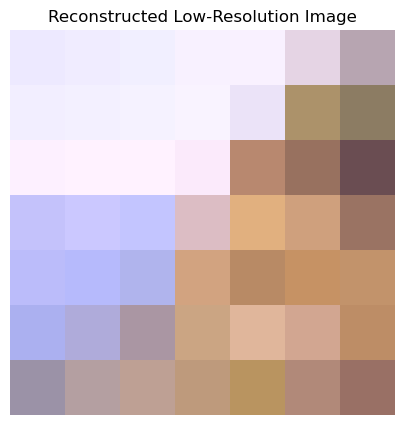

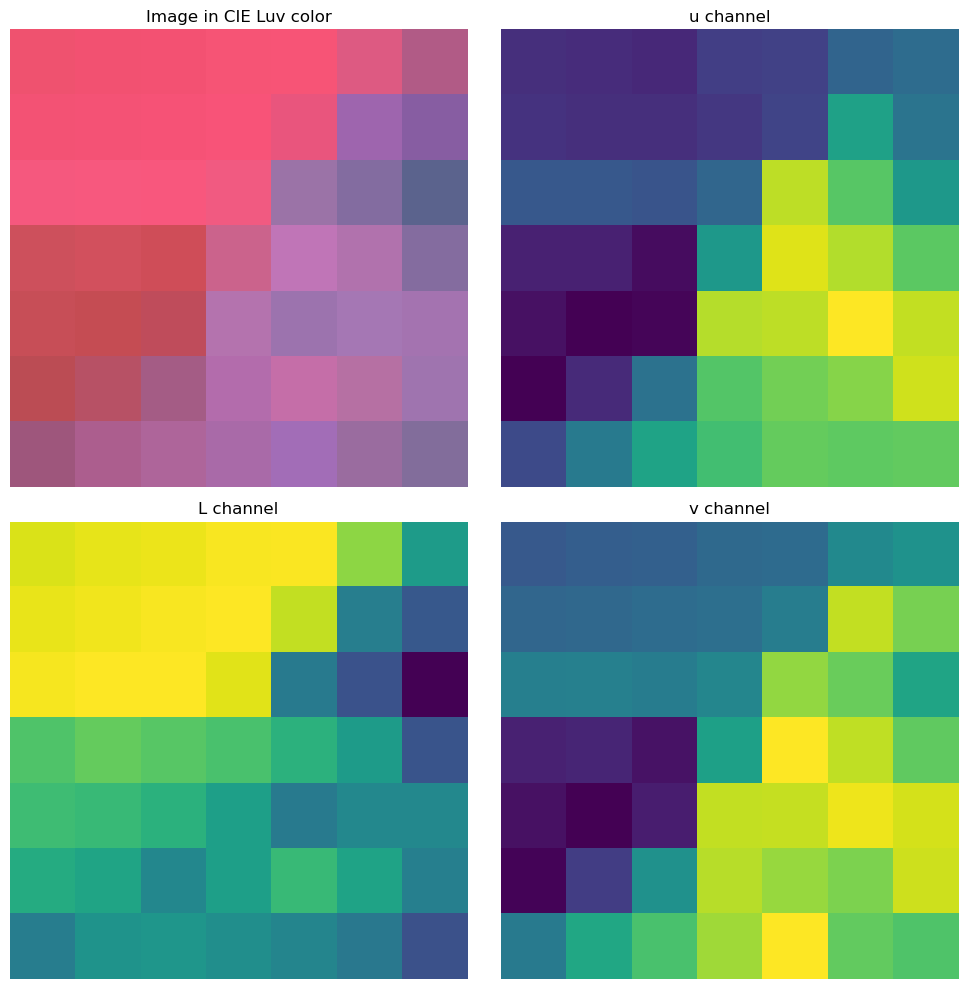

In [18]:
# assume the first 49 is E[L] followed by 49 sd(L)
# assume the next  49 is E[u] followed by 49 sd(u)
# assume the next  49 is E[v] followed by 49 sd(v)
feature_vector = df.loc[3, attr_name].astype(float).to_numpy()  # Example feature vector

# extract means (first moments) for L, u, v channels
luv_means = feature_vector.reshape(3, 2, 7 * 7)[:, 0].transpose()
# Undo standard scaling and return to rgb
rgb_means = color.luv2rgb(luv_means * luv_range + luv_start)

# reshape into 7x7 grid for each Luv channel
luv_image = luv_means.reshape(7, 7, 3) 

# Convert Luv to RGB
rgb_image = rgb_means.reshape(7, 7, 3)

# Step 3: Visualize the Reconstructed Low-Resolution Image
plt.figure(figsize=(5, 5))
plt.gcf().tight_layout()
plt.imshow(rgb_image)
plt.title("Reconstructed Low-Resolution Image")
plt.axis("off")
plt.savefig("images/RGB_channels.png")
plt.show()


# Step 3: Visualize the CIE Luv Low-Resolution Image
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(luv_image)
axs[0, 0].set_title("Image in CIE Luv color")
axs[0, 0].axis("off")

luv_image = luv_means.reshape(7, 7, 3)[:,:,0]

axs[1, 0].imshow(luv_image)
axs[1, 0].set_title("L channel")
axs[1, 0].axis("off")

luv_image = luv_means.reshape(7, 7, 3)[:,:,1]

axs[0, 1].imshow(luv_image)
axs[0, 1].set_title("u channel")
axs[0, 1].axis("off")

luv_image = luv_means.reshape(7, 7, 3)[:,:,2]

axs[1, 1].imshow(luv_image)
axs[1, 1].set_title("v channel")
axs[1, 1].axis("off")

fig.tight_layout()
plt.savefig("images/Luv_channels.png")
plt.show()

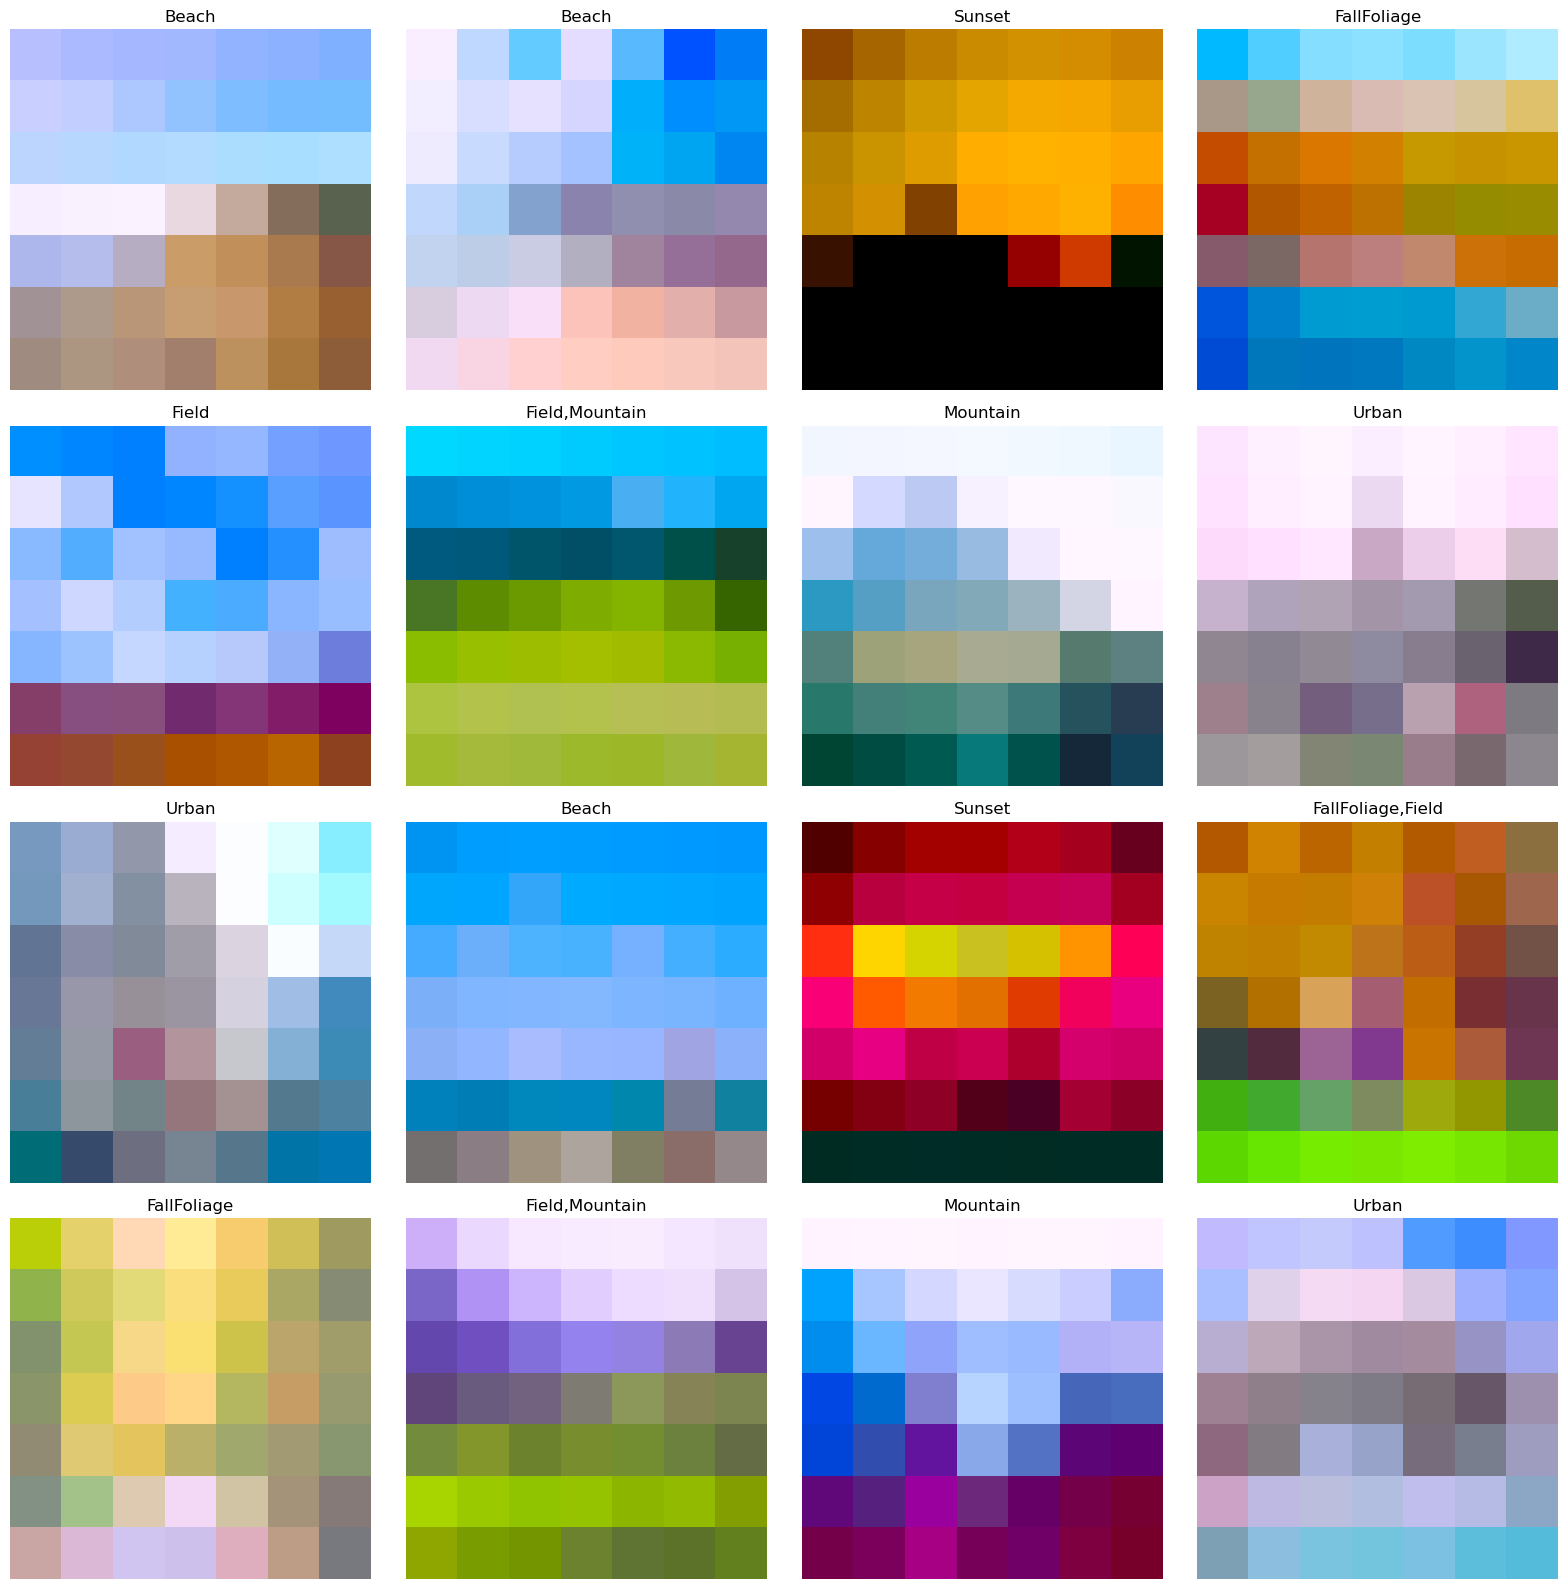

In [19]:
start = 2
skip = 150
feature_vector = df.loc[start::skip, attr_name].astype(float).to_numpy()
class_vector = df.loc[start::skip, target_name].astype(bool).to_numpy()
names = np.array(target_name)

# extract means (first moments) for L, u, v channels
luv_means = feature_vector.reshape(-1, 3, 2, 7 * 7)[:, :, 0, :].transpose(0, 2, 1)
# Undo standard scaling and return to rgb
rgb_means = color.luv2rgb(luv_means * luv_range + luv_start)

# Convert Luv to RGB
rgb_images = rgb_means.reshape(-1, 7, 7, 3)
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for (rgb, ax, kind) in zip(rgb_images, axs.flatten(), class_vector):
    ax.imshow(rgb)
    ax.set_title(",".join(names[kind]))
    ax.axis("off")

fig.tight_layout()
plt.savefig("images/dataset_images.png")
plt.show()

In [20]:
####################################################################################
############## END OF EDA ##########################################################
####################################################################################

In [21]:
##################### FEATURE IMPORTANCE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_name, zero_division=0))

              precision    recall  f1-score   support

       Beach       0.90      0.51      0.65        91
      Sunset       0.97      0.83      0.89        81
 FallFoliage       0.97      0.78      0.87        93
       Field       0.94      0.75      0.83        79
    Mountain       0.97      0.30      0.46        99
       Urban       0.89      0.45      0.60        69

   micro avg       0.94      0.60      0.73       512
   macro avg       0.94      0.60      0.72       512
weighted avg       0.94      0.60      0.71       512
 samples avg       0.63      0.61      0.62       512



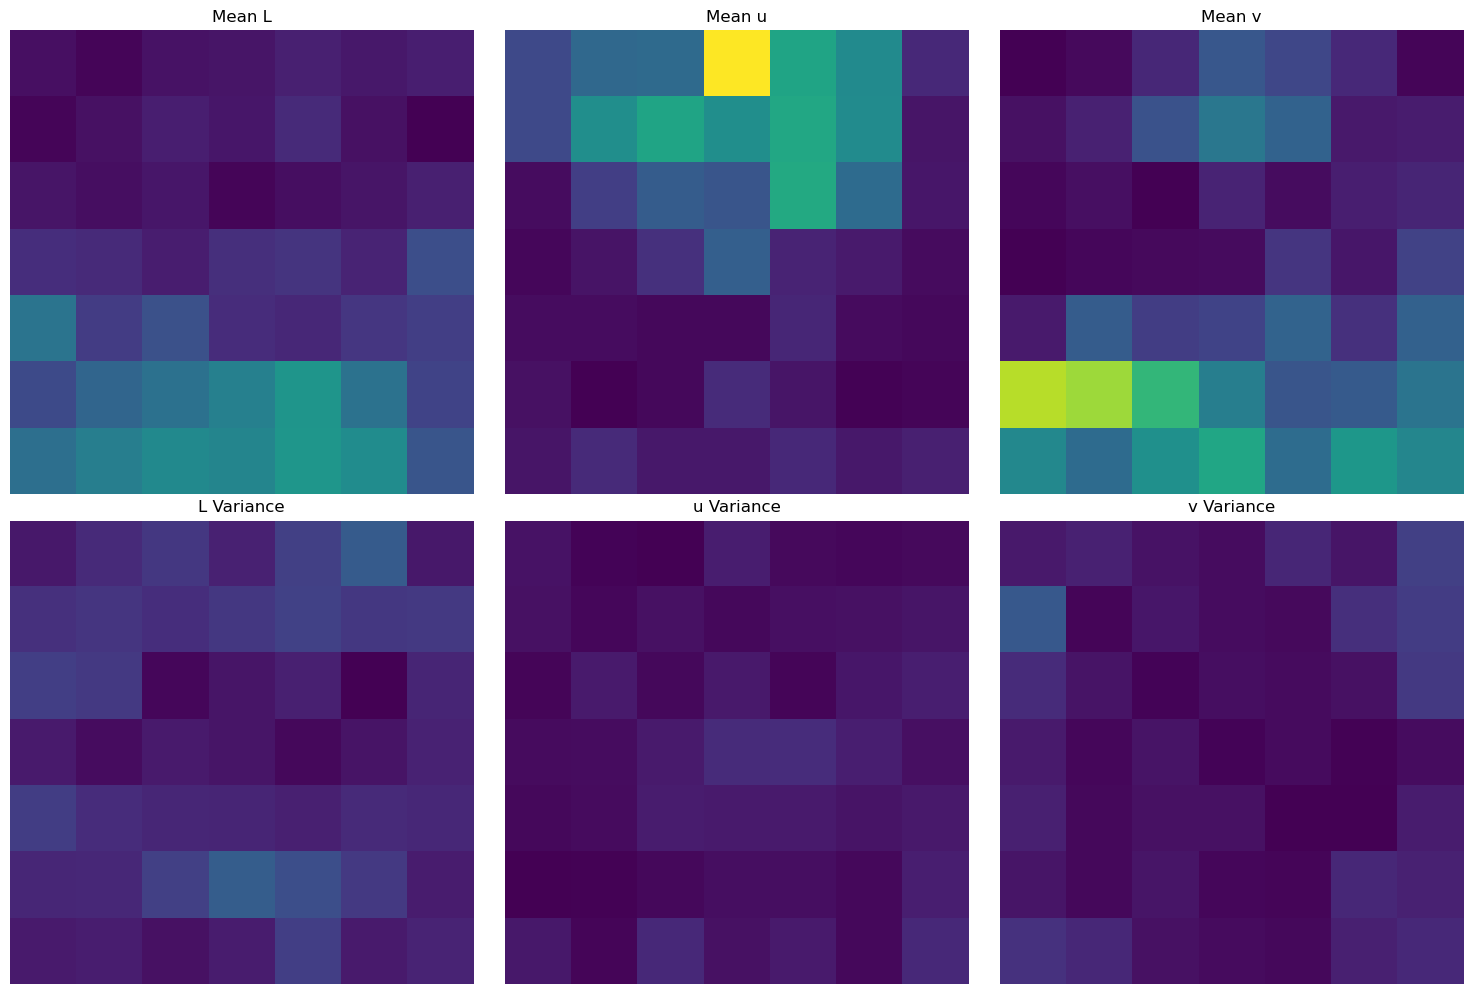

In [23]:
feat_img = model.feature_importances_.reshape(6, 7, 7)
top = feat_img.max()
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for (feat, ax, channel, stat) in zip(
    feat_img, axs.transpose().flatten(), ["L", "L", "u", "u", "v", "v"], ["Mean {}", "{} Variance"] * 3
):
    ax.imshow(feat, vmax = top)
    ax.set_title(stat.format(channel))
    ax.axis("off")

fig.tight_layout()
plt.savefig("images/feat_importance.png")
plt.show()